In [1]:
import warnings
warnings.filterwarnings(action='ignore') ## comment this line for debugging internal library warnings

## Data Exploration 

In [2]:
import pandas as pd

## read CSV file and compute describe dataset
df = pd.read_csv("./SampleCaseStudyData.csv")
df.describe()

,Unnamed: 0,canceledFlag,time2Checkin,arrivalWeek,arrivalDay,numberWeekendnights,numberNights,adults,chidren,repeatFlag,historicCancellations,historicBookings,changesFlag,waitingDays,numberofRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.031912,0.087118,0.137097,0.221124,2.321149,0.571363
std,34465.068657,0.482918,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.175767,0.844336,1.497437,0.652306,17.594721,0.792798
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5.000000


In [3]:
df.head()

,Unnamed: 0,type,canceledFlag,time2Checkin,arrivalMonth,arrivalWeek,arrivalDay,numberWeekendnights,numberNights,adults,...,repeatFlag,historicCancellations,historicBookings,roomType,assignedType,changesFlag,deposit,waitingDays,customerSegment,numberofRequests
0,0,R,0,342,July,27,1,0,0,2,...,0,0,0,C,C,3,No Deposit,0,T,0
1,1,R,0,737,July,27,1,0,0,2,...,0,0,0,C,C,4,No Deposit,0,T,0
2,2,R,0,7,July,27,1,0,1,1,...,0,0,0,A,C,0,No Deposit,0,T,0
3,3,R,0,13,July,27,1,0,1,1,...,0,0,0,A,A,0,No Deposit,0,T,0
4,4,R,0,14,July,27,1,0,2,2,...,0,0,0,A,A,0,No Deposit,0,T,1


In [4]:
df.tail()

,Unnamed: 0,type,canceledFlag,time2Checkin,arrivalMonth,arrivalWeek,arrivalDay,numberWeekendnights,numberNights,adults,...,repeatFlag,historicCancellations,historicBookings,roomType,assignedType,changesFlag,deposit,waitingDays,customerSegment,numberofRequests
119385,119385,C,0,23,August,35,30,2,5,2,...,0,0,0,A,A,0,No Deposit,0,T,0
119386,119386,C,0,102,August,35,31,2,5,3,...,0,0,0,E,E,0,No Deposit,0,T,2
119387,119387,C,0,34,August,35,31,2,5,2,...,0,0,0,D,D,0,No Deposit,0,T,4
119388,119388,C,0,109,August,35,31,2,5,2,...,0,0,0,A,A,0,No Deposit,0,T,0
119389,119389,C,0,205,August,35,29,2,7,2,...,0,0,0,A,A,0,No Deposit,0,T,2


In [5]:
# Print out the columns/features of the dataset

df.columns.values[0] = "id"
print(f"Shape: {df.shape}")
print(f"Columns :{df.columns}")

Shape: (119390, 23)
Columns :Index(['id', 'type', 'canceledFlag', 'time2Checkin', 'arrivalMonth',
       'arrivalWeek', 'arrivalDay', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'country', 'segment', 'repeatFlag',
       'historicCancellations', 'historicBookings', 'roomType', 'assignedType',
       'changesFlag', 'deposit', 'waitingDays', 'customerSegment',
       'numberofRequests'],
      dtype='object')


Columns with missing values: ['chidren', 'country']


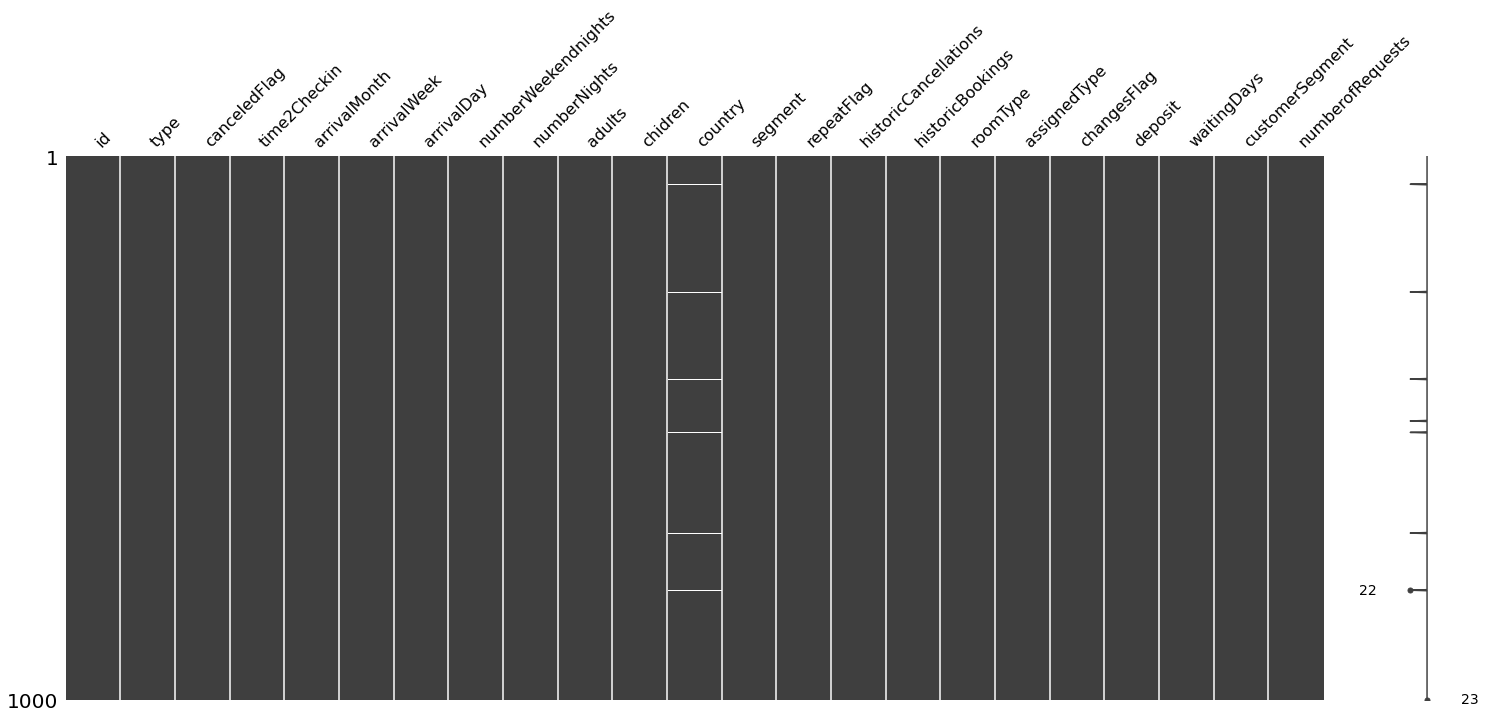

In [6]:
import missingno as msno

# Analyze which columns are missing values
nan_columns = df.isna().any()
columns_with_nan = df.columns[nan_columns].tolist()
print(f"Columns with missing values: {columns_with_nan}")

# Get an visual idea of how many values are missing in a random sample per column
msno.matrix(df.sample(1000))

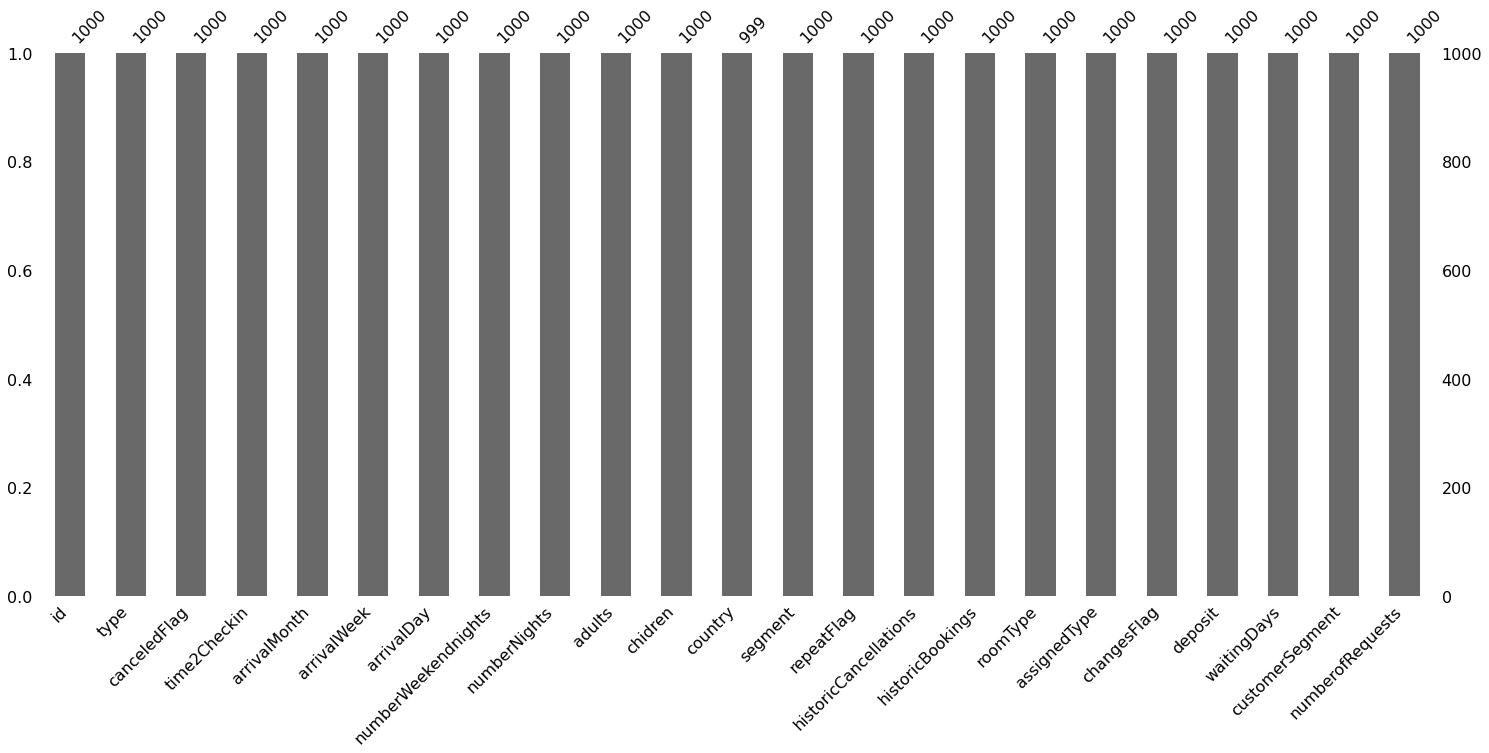

In [7]:
# Get a quantitative idea of how many values are missing in a random sample

msno.bar(df.sample(1000))

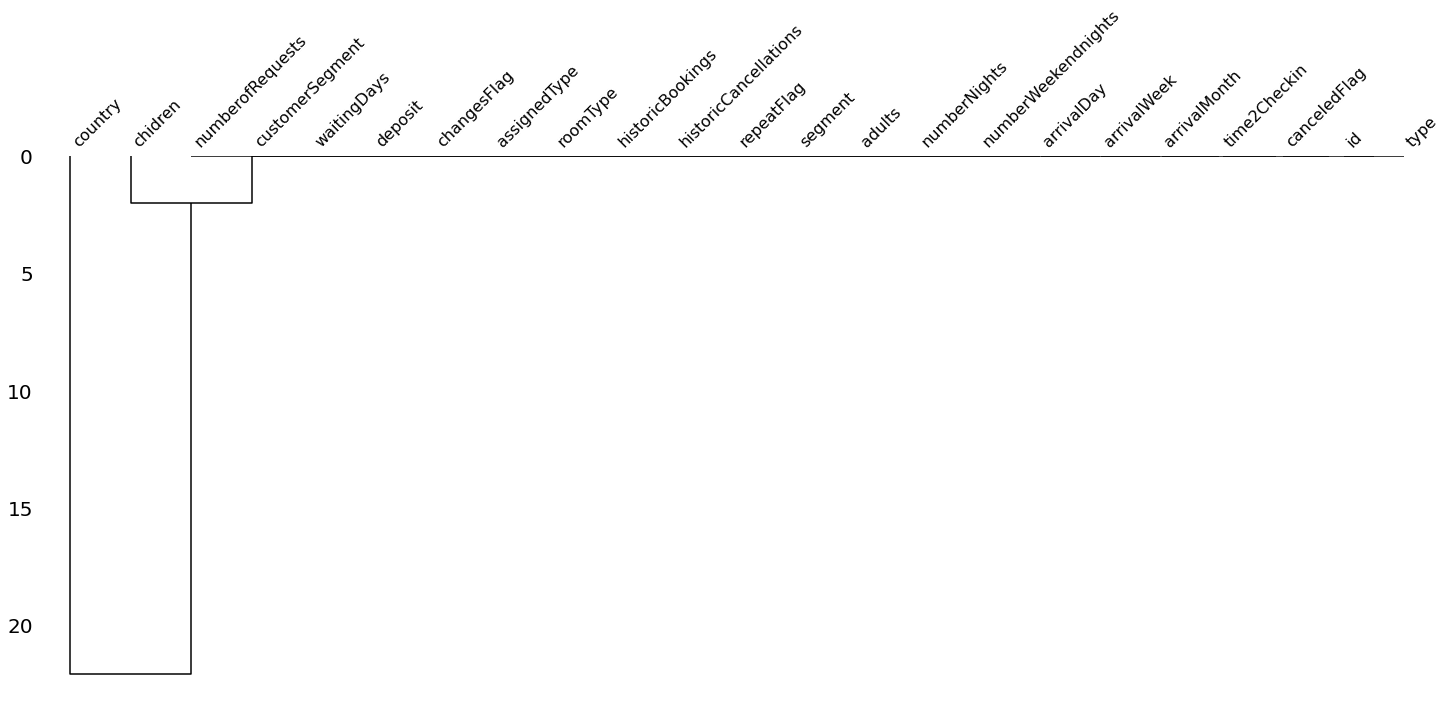

In [8]:
msno.dendrogram(df)

THe above dendorgram uses a hierachical clustering algorithm to bin features together based on their nullity correlation. The large distance between country and children implies that missing values of these two features are
not co-occuring i.e. their missing values are realtively independent of each other

In [9]:
print(f"""Skewness: 
{df.skew()[1:]}, 
Kurtosis: 
{df.kurt()[1:]}""")

Skewness: 
canceledFlag              0.536678
time2Checkin              1.346550
arrivalWeek              -0.010014
arrivalDay               -0.002000
numberWeekendnights       1.380046
numberNights              2.862249
adults                   18.317805
chidren                   4.112590
repeatFlag                5.326315
historicCancellations    24.458049
historicBookings         23.539800
changesFlag               6.000270
waitingDays              11.944353
numberofRequests          1.349189
dtype: float64, 
Kurtosis: 
canceledFlag               -1.712005
time2Checkin                1.696449
arrivalWeek                -0.986077
arrivalDay                 -1.187168
numberWeekendnights         7.174066
numberNights               24.284555
adults                   1352.115116
chidren                    18.673692
repeatFlag                 26.370077
historicCancellations     674.073693
historicBookings          767.245210
changesFlag                79.393605
waitingDays               1

The features adults, historicCancellations, historicBookings and waitingDays have relatively high skewness while adults, historicCanellations, historicBookings and waitingDays have high kurtosis implying in both cases that a normal/Gaussian assumption is violated. It may not be possible to fully model this data using linear models to high degree of accuracy for a regression or a classification task 

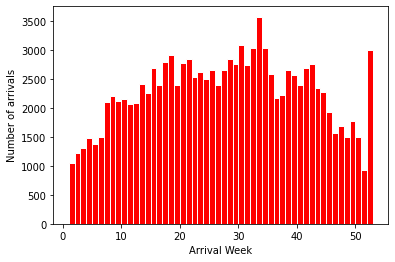

In [10]:
from matplotlib import pyplot as plt

# Plot a histogram for arrivalWeek feature
plt.hist(df['arrivalWeek'],orientation = 'vertical',histtype = 'bar', color ='red', edgecolor='white', bins=52)
plt.xlabel('Arrival Week')
plt.ylabel('Number of arrivals')
plt.show()

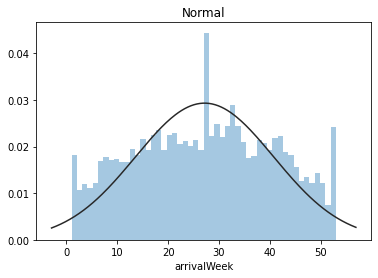

In [11]:
import scipy.stats as st
import seaborn as sns
import numpy as np

# Fit a normal distribution to the arrivalWeek feature 
y = df['arrivalWeek']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

The above is a sample histogram for one of the features - arrivalWeak. It shows that the end of the year holday week is when significant arrivals occur as compared to adjacent weaks. The number of arrivals seams to peak during the summer season in India peak. The second plot shows that distribution for this feature is almost normal except for a few outlier peaks like the last week of the year

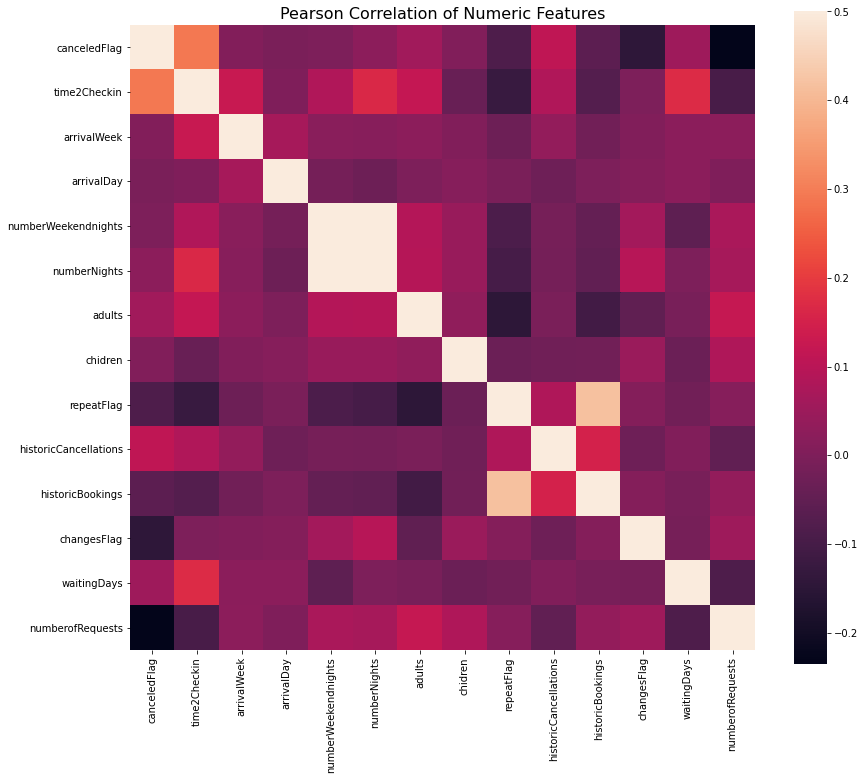

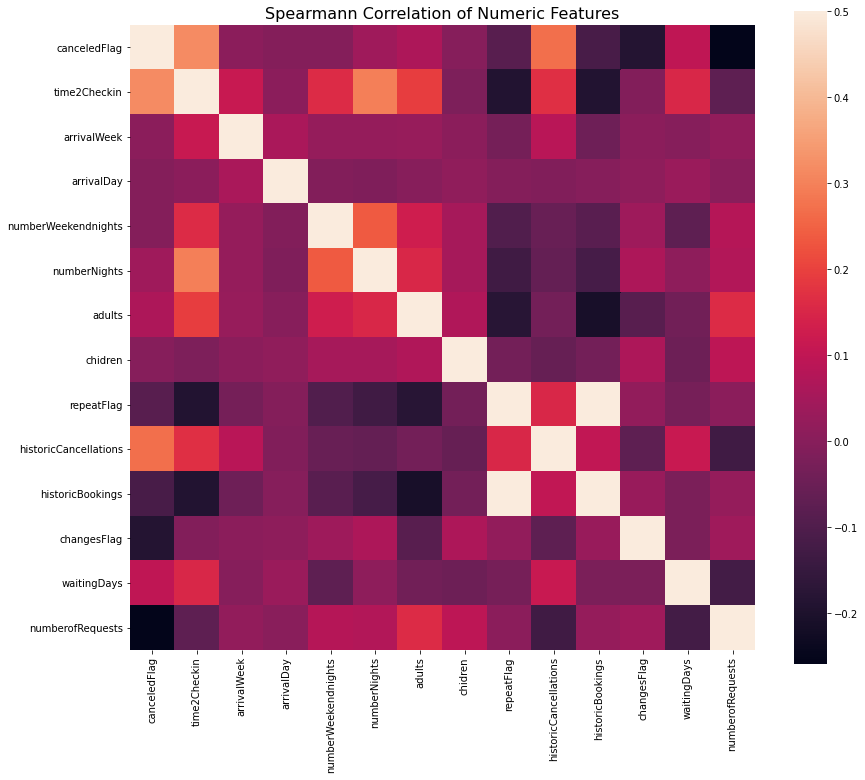

In [12]:
# Find the correlation amongst features having numeric datatypes
# using Pearson and Spearmann correlation coefficient

numeric_features = df.select_dtypes(include=[np.number]).drop("id", 1)
numeric_features= numeric_features.fillna(numeric_features.median())# fill in missing 'children' values with median
correlation = numeric_features.corr()
f , ax = plt.subplots(figsize = (14,12))
plt.title('Pearson Correlation of Numeric Features',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.5)
spearmann_correlation = numeric_features.corr(method="spearman")
f , ax = plt.subplots(figsize = (14,12))
plt.title('Spearmann Correlation of Numeric Features',y=1,size=16)
sns.heatmap(spearmann_correlation,square = True,  vmax=0.5)



Index(['canceledFlag', 'time2Checkin', 'numberofRequests', 'changesFlag',
       'historicCancellations', 'repeatFlag', 'adults', 'historicBookings',
       'waitingDays', 'numberNights', 'arrivalWeek'],
      dtype='object')
Index(['canceledFlag', 'time2Checkin', 'historicCancellations',
       'numberofRequests', 'changesFlag', 'historicBookings', 'waitingDays',
       'repeatFlag', 'adults', 'numberNights', 'arrivalWeek'],
      dtype='object')


Text(0.5, 1, 'Spearmann Correlation of Numeric Features')

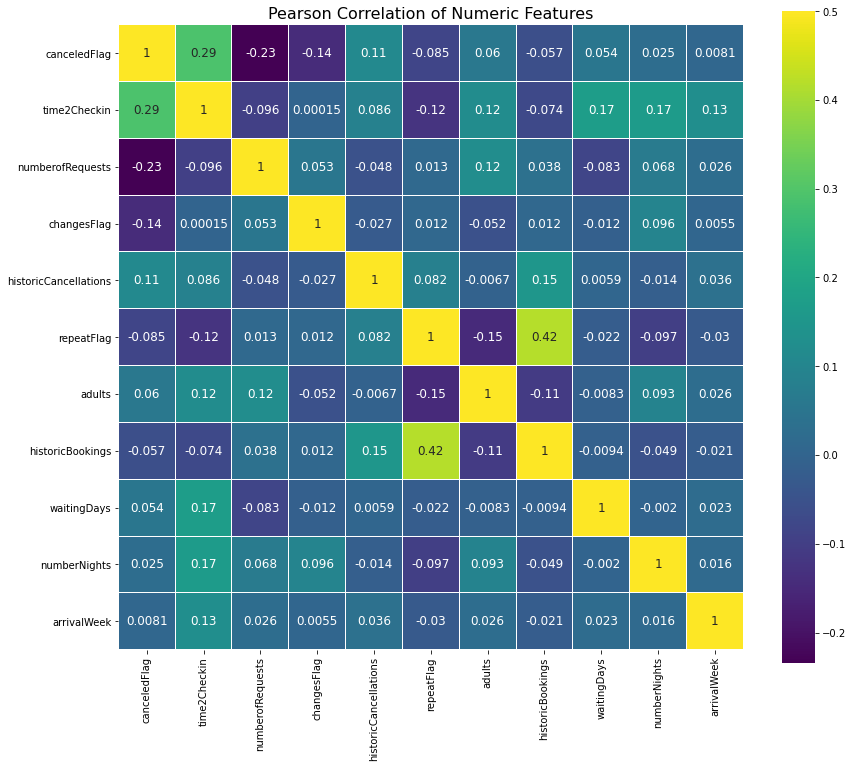

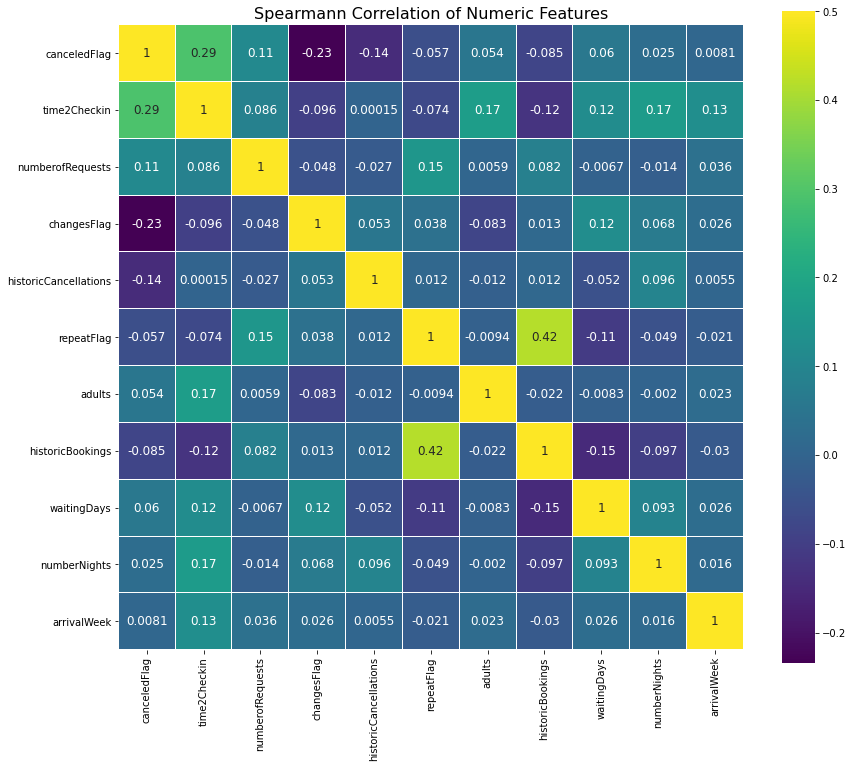

In [13]:
# Build a numeric heatmap based on histogram coefficients to identify features
# that display a linear of monotonic correlation

k= 11
cols = correlation.abs().nlargest(k,'canceledFlag')['canceledFlag'].index
print(cols)
cm = np.corrcoef(numeric_features[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.5, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.title('Pearson Correlation of Numeric Features',y=1,size=16)

spearmann_cols = spearmann_correlation.abs().nlargest(k,'canceledFlag')['canceledFlag'].index
print(spearmann_cols)
spearmann_cm = np.corrcoef(numeric_features[spearmann_cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(spearmann_cm, vmax=.5, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.title('Spearmann Correlation of Numeric Features',y=1,size=16)

The pearson correlation identifies a linear relationship while the spearmann correlation identifies a montonically increasing relationship between two variables. Both of them may fail to model certain kinds of nonlinear relationships. However, visualizing them gives useful insights into simple relationships that may lead to actionable and explainable business insights. For instance, from the above two matrics there are two strong correlations: first between time2Checkin and canceledFlag and the second between repeatFlag and changesFlag/historicBookings flag. The time2Checkin is high for a significant proportion of times when cancellations occur. Reducing the time2Checkin for inperson checkins might reduce customer dissatisfaction that probably leads to cancellation is some cases? The second relationship implies that repeat customers are usually more familiar with the user interface and apparently make a lot of changes in their roomBookings to customize their needs    

## Predicting Cancellations

In [14]:
cancellations = df["canceledFlag"].sum()
print("""
Total Bookings: {}
Number of Cancellations: {}
Percentage Cancellations: {:0.2f} %""".format(df.shape[0], cancellations,(100*cancellations/df.shape[0])))


Total Bookings: 119390
Number of Cancellations: 44224
Percentage Cancellations: 37.04 %


In [15]:
print(correlation['canceledFlag'].sort_values(ascending = False),'\n')

canceledFlag             1.000000
time2Checkin             0.293123
historicCancellations    0.110133
adults                   0.060017
waitingDays              0.054186
numberNights             0.024765
arrivalWeek              0.008148
chidren                  0.005036
numberWeekendnights     -0.001791
arrivalDay              -0.006130
historicBookings        -0.057358
repeatFlag              -0.084793
changesFlag             -0.144381
numberofRequests        -0.234658
Name: canceledFlag, dtype: float64 



In [16]:
# add additional roomChangeFlag feature

df["roomChangeFlag"] = np.where(df["roomType"]== df["assignedType"], 0, 1)
numeric_features = df.select_dtypes(include=[np.number])
numeric_features= numeric_features.fillna(numeric_features.median())
correlation = numeric_features.corr()
print(correlation['canceledFlag'].sort_values(ascending = False),'\n')

canceledFlag             1.000000
time2Checkin             0.293123
historicCancellations    0.110133
adults                   0.060017
waitingDays              0.054186
numberNights             0.024765
arrivalWeek              0.008148
chidren                  0.005036
numberWeekendnights     -0.001791
arrivalDay              -0.006130
historicBookings        -0.057358
repeatFlag              -0.084793
changesFlag             -0.144381
numberofRequests        -0.234658
id                      -0.242238
roomChangeFlag          -0.247770
Name: canceledFlag, dtype: float64 



Let's try predicting the probability of cancellation at different stages of the customer experience. The above two code blocks output the correlation coefficients for the cancelledFlag with each of the other features. Both a high positive and negative correlation are useful in this regard. One additional feature which captures customer satisfaction/disatisfaction in requesting a different assigned room than booked room has also been created named 'roomChangeFlag'. There is a negative correlation of canceledFlag with roomChangeFlag. One possible explanation for this relationship is that customers whose requests to change their type of room during checkin is not accomodated are usually dissatisfied

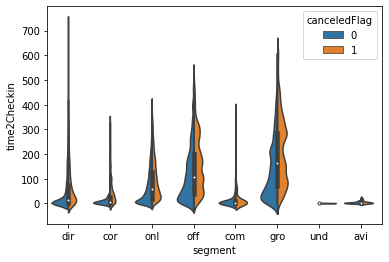

In [17]:
sns.violinplot(x ="segment", y ="time2Checkin", hue ="canceledFlag",
data = df, split = True)

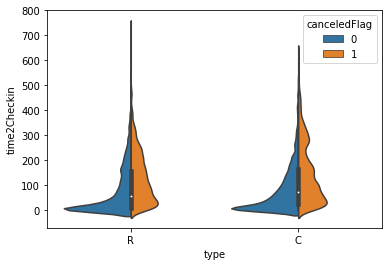

In [18]:
sns.violinplot(x ="type", y ="time2Checkin", hue ="canceledFlag",
data = df, split = True)

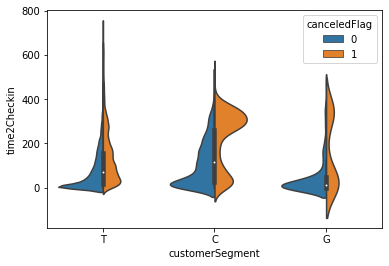

In [19]:
sns.violinplot(x ="customerSegment", y ="time2Checkin", hue ="canceledFlag",
data = df, split = True)

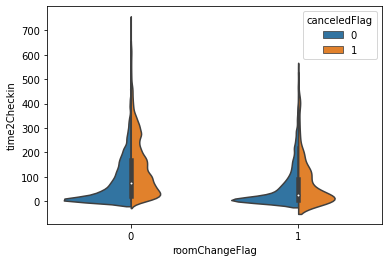

In [20]:
sns.violinplot(x ="roomChangeFlag", y ="time2Checkin", hue ="canceledFlag",
data = df, split = True)

The above plots show the relationship between highyly correlated time2Checkin and cancelledFlag alongwith different categorical features like 'segment', 'type' (room?) and 'customerSegment'. Some insights are discussed related to these based on my limited understanding of the features and the business of the company. The customers who have offline bookings are more likely to spend a significant more time in checkIn before arriving at a decision to cancel their booking as compared to customers who have booked online through the app. The general trend between time2Checkin and cancellation is reaffirmed as the cancelled distributions have a fatter tail (more kurtosis) than the noncancelled distributions across all segments. The bimodal cancellation distribution in the last plot for customerSegments C and G is interesting as it implies that there is window of time2Checkin in which the probability of non-cancellation is much higher than cancellation. Business implications? Train hotel receptionists to persistenly and adequately address customer requests/concerns during checkIn to reduce cancellations. 

In [21]:
from sklearn import model_selection

## Introduce k-folds (k =5) for cross-validation and avoid overfitting, reformulate
## as binary classification problem. Let the canceledFlag feature be the target variable
## which will be predicted

df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset
df.rename(columns = {"canceledFlag":"target"}, inplace = True)
y = df.target.values

# Try dropping some features having low correlation with cancellationFlag
# df = df.drop(['arrivalWeek', 'arrivalDay'], axis=1)

kf = model_selection.StratifiedKFold(n_splits=5)

for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
    
df.kfold.value_counts()

df.to_csv("./SampleCaseStudyDataFolds.csv")  ## Save another csv file with folds information to readin later

df.head()

,id,type,target,time2Checkin,arrivalMonth,arrivalWeek,arrivalDay,numberWeekendnights,numberNights,adults,...,historicBookings,roomType,assignedType,changesFlag,deposit,waitingDays,customerSegment,numberofRequests,roomChangeFlag,kfold
0,89162,C,0,52,May,21,15,2,1,1,...,0,D,D,0,No Deposit,0,T,1,0,0
1,37894,R,0,139,June,26,29,0,3,2,...,0,C,H,3,No Deposit,0,T,1,1,0
2,90556,C,0,247,June,24,6,1,1,2,...,0,A,D,0,No Deposit,0,T,1,1,0
3,60205,C,1,277,November,46,7,1,2,2,...,0,A,A,0,Non Refund,0,T,0,0,0
4,99742,C,0,100,October,42,13,0,3,2,...,0,E,F,4,No Deposit,0,T,0,1,0


In [22]:
for idx in range(5):
    print(f"""Labels for fold {idx}: 
{df[df.kfold==idx].target.value_counts()}
""")

Labels for fold 0: 
0    15034
1     8844
Name: target, dtype: int64

Labels for fold 1: 
0    15033
1     8845
Name: target, dtype: int64

Labels for fold 2: 
0    15033
1     8845
Name: target, dtype: int64

Labels for fold 3: 
0    15033
1     8845
Name: target, dtype: int64

Labels for fold 4: 
0    15033
1     8845
Name: target, dtype: int64



Cross validation is necessary to avoid overfitting the training data by keeping a validation set. The data is class imbalanced as shown above for each folds and startified k-folds cross validation preserves this
ratio of two classes across different folds to get consistent results. Otherwise we might for example optimisitically estimate accuracy or AUC for some fold which has all non-cancellations 

In [23]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


def run_logistic_regression(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)

    # These are the numeric features selected for logistic regression. Note that     
    # some inherently numeric features like arrivalWeek, arrivalDay and repeatFlag
    # are treated as categorical features althrough their data type is numeric
    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    # For cateogorical features fill in missing values using a "NONE" category
    for col in categorical_features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")   
           
    # Fill in missing numeric values in "children" with median value        
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
    
    # An KNN imputer was tried out to impute missing "children" values with no noticeable improvements
    
    #     imputer = KNNImputer(n_neighbors=2)
    #     df[numerical_features] = imputer.fit_transform(df[numerical_features])
    
    # Normalize the numerical features to have zero mean and variance 1 unit
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
        
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # Use one hot encoding of categorical features 
    ohe = preprocessing.OneHotEncoder(sparse=False)
    
    full_categorical_data = pd.concat([df_train[categorical_features], df_valid[categorical_features]], axis=0)
    ohe.fit(full_categorical_data[categorical_features])
    
    # Concatenate numeric snd one-hot encoded categorical features
    x_train = pd.concat([pd.DataFrame(ohe.transform(df_train[categorical_features])), 
                         df_train[numerical_features]], axis=1)
    x_valid = pd.concat([pd.DataFrame(ohe.transform(df_valid[categorical_features])), 
                         df_valid[numerical_features]], axis=1)
    
    model = linear_model.LogisticRegression()
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    return auc, acc
    
if __name__ == "__main__":
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_logistic_regression(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Logistic Regression (Standard Normalized Categorical One-hot Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Logistic Regression (Standard Normalized Categorical One-hot Encoded) = {:.2f}".format(acc_sum/5))

Fold = 0, AUC = 0.8874, Accuracy = 81.23
Fold = 1, AUC = 0.8868, Accuracy = 81.06
Fold = 2, AUC = 0.8885, Accuracy = 81.23
Fold = 3, AUC = 0.8857, Accuracy = 80.79
Fold = 4, AUC = 0.8834, Accuracy = 80.56
Average K-Fold AUC for Logistic Regression (Standard Normalized Categorical One-hot Encoded) = 0.8864
Average K-Fold Accuracy for Logistic Regression (Standard Normalized Categorical One-hot Encoded) = 80.97


In [24]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


def run_logistic_regression2(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)

    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    # Let's try using LabelEncoding for categorical features in this variant of logistic
    # regression
    for col in categorical_features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
            
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
        
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    x_train = df_train
    x_valid = df_valid
    
    model = linear_model.LogisticRegression()
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    return auc, acc
    
if __name__ == "__main__":
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_logistic_regression2(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Logistic Regression (Standard Normalized Categorical Label Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Logistic Regression (Standard Normalized Categorical Label Encoded) = {:.2f}".format(acc_sum/5))  

Fold = 0, AUC = 0.8452, Accuracy = 80.01
Fold = 1, AUC = 0.9159, Accuracy = 84.87
Fold = 2, AUC = 0.8388, Accuracy = 79.22
Fold = 3, AUC = 0.8388, Accuracy = 79.32
Fold = 4, AUC = 0.6976, Accuracy = 64.54
Average K-Fold AUC for Logistic Regression (Standard Normalized Categorical Label Encoded) = 0.8273
Average K-Fold Accuracy for Logistic Regression (Standard Normalized Categorical Label Encoded) = 77.59


In [25]:
def run_logistic_regression3(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    # Treat all features as categorical and one hot encode them
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    ohe = preprocessing.OneHotEncoder()
    
    full_data = pd.concat([df_train[features], df_valid[features]], axis=0)
    ohe.fit(full_data[features])
    
    x_train = ohe.transform(df_train[features])
    x_valid = ohe.transform(df_valid[features])
    
    model = linear_model.LogisticRegression()
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    return auc, acc
    
if __name__ == "__main__":
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        
        auc, acc = run_logistic_regression3(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Logistic Regression (Universal One-hot Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Logistic Regression (Universal One-hot Encoded) = {:.2f}".format(acc_sum/5))


Fold = 0, AUC = 0.9023, Accuracy = 83.17
Fold = 1, AUC = 0.9041, Accuracy = 82.96
Fold = 2, AUC = 0.9027, Accuracy = 83.13
Fold = 3, AUC = 0.8998, Accuracy = 82.62
Fold = 4, AUC = 0.9005, Accuracy = 82.68
Average K-Fold AUC for Logistic Regression (Universal One-hot Encoded) = 0.9019
Average K-Fold Accuracy for Logistic Regression (Universal One-hot Encoded) = 82.91


Three variants of Logistic Regression are tried out: Standard Normalized Categorical One-hot Encoded, Standard Normalized Categorical Label Encoded and Universal One-hot Encoded. Out of these Universal One-hot Encoded gives the best AUC and accuracy. In this variant all features - numeric as well as categorical were converted to strings and missing values were filled with "None". Then all columns were one-hot encoded. Since all integers were discrete integers already it was natural to follow this approach without worrying about binning floating point numbers. In the first two approaches numeric features were normalized first and categorical features were either label encoded or one-hot encoded. Label encoding performed slightly worse than one-hot encoding 

Fold = 0, AUC = 0.9400, Accuracy = 87.33


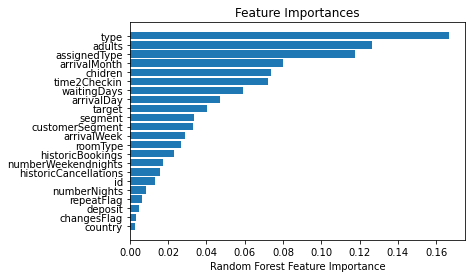

Fold = 1, AUC = 0.9417, Accuracy = 87.48


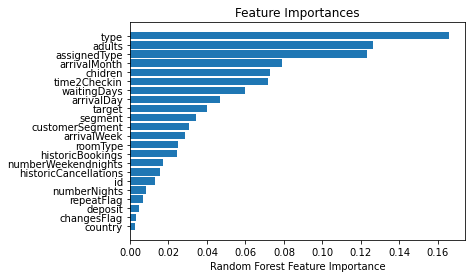

Fold = 2, AUC = 0.9426, Accuracy = 87.53


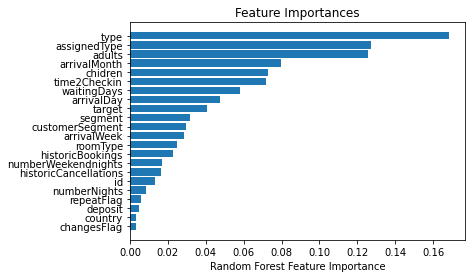

Fold = 3, AUC = 0.9377, Accuracy = 86.98


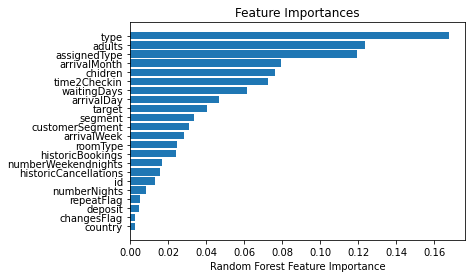

Fold = 4, AUC = 0.9408, Accuracy = 87.10


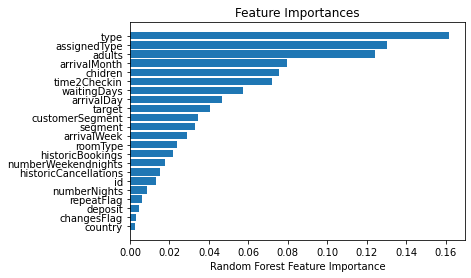

Average K-Fold AUC for Random Forest (Categorical Label Encoded) = 0.9405
Average K-Fold Accuracy for Random Forest (Categorical Label Encoded) = 87.28


In [26]:
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler

def run_random_forest(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    for col in categorical_features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
        
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())    
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    x_train = df_train[features]
    x_valid = df_valid[features]
    
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    col_names = df_train.columns
    importances = model.feature_importances_
    idxs = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(idxs)), importances[idxs], align='center')
    plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
    plt.xlabel('Random Forest Feature Importance')
    plt.show()
    
    return auc, acc
    
if __name__ == "__main__":   
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_random_forest(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Random Forest (Categorical Label Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Random Forest (Categorical Label Encoded) = {:.2f}".format(acc_sum/5))
    
    

Fold = 0, AUC = 0.9353, Accuracy = 86.35


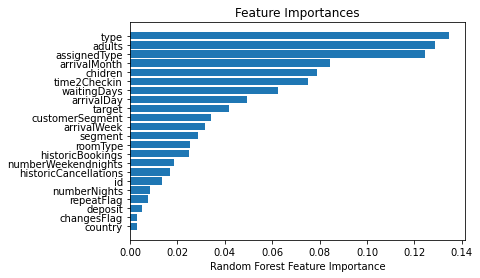

Fold = 1, AUC = 0.9375, Accuracy = 86.72


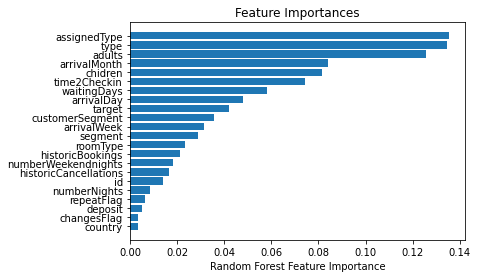

Fold = 2, AUC = 0.9380, Accuracy = 86.82


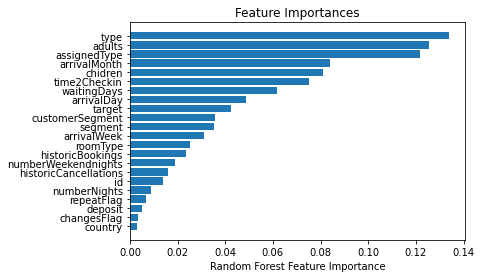

Fold = 3, AUC = 0.9335, Accuracy = 86.06


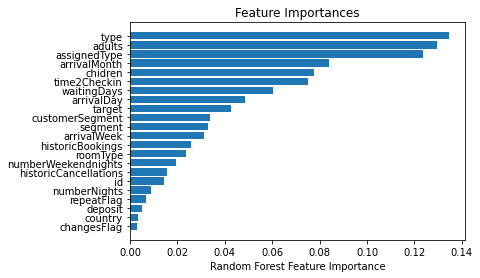

Fold = 4, AUC = 0.9355, Accuracy = 86.44


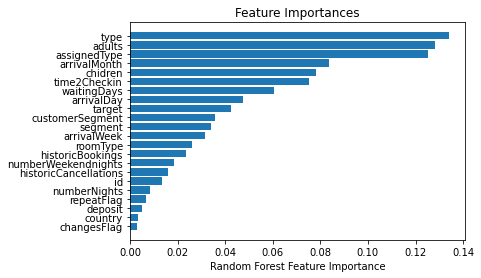

Average K-Fold AUC for Random Forest (Universal Label Encoded) = 0.9360
Average K-Fold Accuracy for Random Forest (Universal Label Encoded) = 86.48


In [27]:
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler

def run_random_forest2(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
    
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    x_train = df_train[features]
    x_valid = df_valid[features]
    
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    col_names = df_train.columns
    importances = model.feature_importances_
    idxs = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(idxs)), importances[idxs], align='center')
    plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
    plt.xlabel('Random Forest Feature Importance')
    plt.show()
    
    return auc, acc
    
if __name__ == "__main__":   
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_random_forest2(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Random Forest (Universal Label Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Random Forest (Universal Label Encoded) = {:.2f}".format(acc_sum/5))

In [28]:
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler

def run_random_forest3(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    for col in categorical_features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
        
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())    
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
       
    # Use one hot encoding of categorical features 
    ohe = preprocessing.OneHotEncoder(sparse=False)
    
    full_categorical_data = pd.concat([df_train[categorical_features], df_valid[categorical_features]], axis=0)
    ohe.fit(full_categorical_data[categorical_features])
    
    # Concatenate numeric snd one-hot encoded categorical features
    x_train = pd.concat([pd.DataFrame(ohe.transform(df_train[categorical_features])), 
                         df_train[numerical_features]], axis=1)
    x_valid = pd.concat([pd.DataFrame(ohe.transform(df_valid[categorical_features])), 
                         df_valid[numerical_features]], axis=1)
    
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    return auc, acc
    
if __name__ == "__main__":   
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_random_forest3(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Random Forest (Categorical Onehot Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Random Forest (Categorical Onehot Encoded) = {:.2f}".format(acc_sum/5))
    
    

Fold = 0, AUC = 0.9400, Accuracy = 87.22
Fold = 1, AUC = 0.9420, Accuracy = 87.44
Fold = 2, AUC = 0.9423, Accuracy = 87.44
Fold = 3, AUC = 0.9390, Accuracy = 86.88
Fold = 4, AUC = 0.9407, Accuracy = 87.26
Average K-Fold AUC for Random Forest (Categorical Onehot Encoded) = 0.9408
Average K-Fold Accuracy for Random Forest (Categorical Onehot Encoded) = 87.25


In [29]:
from sklearn import ensemble
from sklearn import decomposition
from  scipy import sparse

def run_random_forest4(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    ohe = preprocessing.OneHotEncoder()
    
    full_data = pd.concat([df_train[features], df_valid[features]], axis=0)
    ohe.fit(full_data[features])
        
    x_train = ohe.transform(df_train[features])
    x_valid = ohe.transform(df_valid[features])
    
    svd = decomposition.TruncatedSVD(n_components=100)
    
    full_sparse = sparse.vstack((x_train, x_valid))
    svd.fit(full_sparse)
    
    x_train = svd.transform(x_train)
    x_valid = svd.transform(x_valid)
    
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    return auc, acc
    
if __name__ == "__main__":   
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_random_forest4(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Random Forest (Truncated Universal One Hot Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Random Forest (Truncated Universal One Hot Encoded) = {:.2f}".format(acc_sum/5))

Fold = 0, AUC = 0.9272, Accuracy = 85.89
Fold = 1, AUC = 0.9272, Accuracy = 85.95
Fold = 2, AUC = 0.9293, Accuracy = 85.87
Fold = 3, AUC = 0.9260, Accuracy = 85.63
Fold = 4, AUC = 0.9248, Accuracy = 85.61
Average K-Fold AUC for Random Forest (Truncated Universal One Hot Encoded) = 0.9269
Average K-Fold Accuracy for Random Forest (Truncated Universal One Hot Encoded) = 85.79


Fold = 0, AUC = 0.9302, Accuracy = 85.66


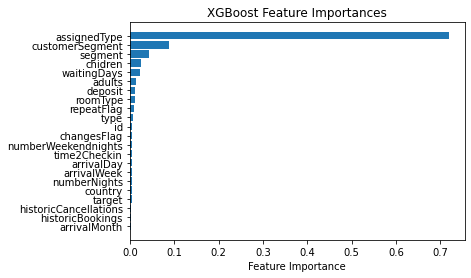

Fold = 1, AUC = 0.9323, Accuracy = 85.94


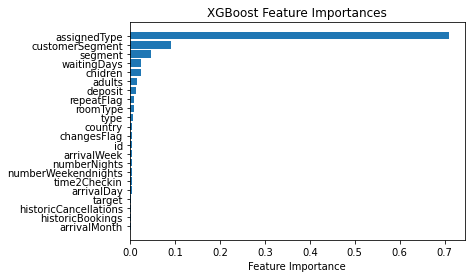

Fold = 2, AUC = 0.9314, Accuracy = 85.66


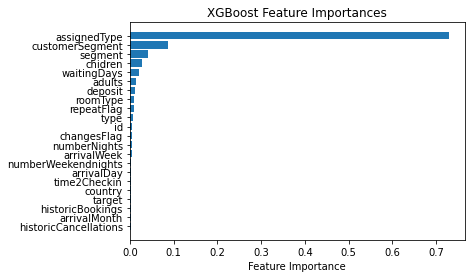

Fold = 3, AUC = 0.9286, Accuracy = 85.44


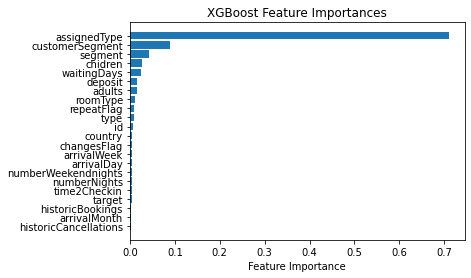

Fold = 4, AUC = 0.9299, Accuracy = 85.59


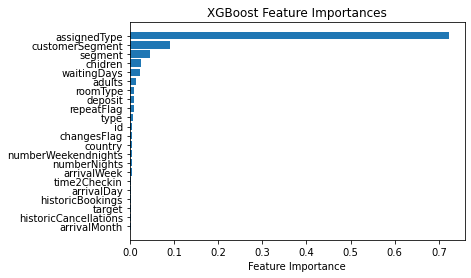

Average K-Fold AUC for XGBoost Random Forest (Categorical Label Encoded) = 0.9305
Average K-Fold Accuracy for XGBoost Random Forest (Categorical Label Encoded) = 85.66


In [30]:
import xgboost as xgb

def run_random_forest_xgboost(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    for col in categorical_features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
        
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())    
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    x_train = df_train[features]
    x_valid = df_valid[features]
    
    model = xgb.XGBClassifier(n_jobs=-1, eval_metric="auc", max_depth=7)
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    col_names = df_train.columns
    importances = model.feature_importances_
    idxs = np.argsort(importances)
    plt.title('XGBoost Feature Importances')
    plt.barh(range(len(idxs)), importances[idxs], align='center')
    plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
    plt.xlabel('Feature Importance')
    plt.show()
    
    return auc, acc
    
if __name__ == "__main__":   
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_random_forest_xgboost(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for XGBoost Random Forest (Categorical Label Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for XGBoost Random Forest (Categorical Label Encoded) = {:.2f}".format(acc_sum/5))

In [31]:
def run_random_forest_xgboost2(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    for col in categorical_features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
        
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())    
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
       
    # Use one hot encoding of categorical features 
    ohe = preprocessing.OneHotEncoder(sparse=False)
    
    full_categorical_data = pd.concat([df_train[categorical_features], df_valid[categorical_features]], axis=0)
    ohe.fit(full_categorical_data[categorical_features])
    
    # Concatenate numeric snd one-hot encoded categorical features
    x_train = pd.concat([pd.DataFrame(ohe.transform(df_train[categorical_features])), 
                         df_train[numerical_features]], axis=1)
    x_valid = pd.concat([pd.DataFrame(ohe.transform(df_valid[categorical_features])), 
                         df_valid[numerical_features]], axis=1)
    
    model = xgb.XGBClassifier(n_jobs=-1, eval_metric="auc", max_depth=7)
    model.fit(x_train, df_train.target.values)
    
    valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_pred = model.predict(x_valid)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    return auc, acc
    
if __name__ == "__main__":   
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_random_forest_xgboost2(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Random Forest XGBoost(Categorical Onehot Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Random Forest XGBoost (Categorical Onehot Encoded) = {:.2f}".format(acc_sum/5))

Fold = 0, AUC = 0.9274, Accuracy = 85.30
Fold = 1, AUC = 0.9303, Accuracy = 85.51
Fold = 2, AUC = 0.9289, Accuracy = 85.33
Fold = 3, AUC = 0.9267, Accuracy = 85.21
Fold = 4, AUC = 0.9274, Accuracy = 85.22
Average K-Fold AUC for Random Forest XGBoost(Categorical Onehot Encoded) = 0.9281
Average K-Fold Accuracy for Random Forest XGBoost (Categorical Onehot Encoded) = 85.31


Random forest with and without boosting were tried after logistic regression. Tree based methods don't require data normalization (unlike logistic regression) and can handle both numeric and categoric data straightaway in the algorithm without special treatment. The categorical label encoding performed best even better than the XGBoost's boosted decision tree variants which is a little surprising. More evidence is needed to corroborate these results. The feature importance is one of the prominent advantages of tree based methods and are useful for designing explainable models. The random forest model with label encoding suggests that categorical features like "type", "assignedType", "target" etc are important for explaining cancellations. Interestingly some numeric features like
"children" and "adults" which had low correlation scores with "canceledFlag" are also very important in determing cancellation. This contradiction can be explained by inability of Pearson correlation coefficient to capture nonlinear realtionships or Spearman coefficient to capture non-monotonic nonlinear realtions. Decision trees and by natural extension random forests which are their ensembles, are able to form highly nonlinear decsion boundaries and may help in forming "explainable" business decisions  

In [32]:
import os
import gc
import joblib
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils

def create_model(data, catcols, numcols):
    ## The catcols and numcols represent categorical and numeric feature names
    
    inputs = []
    outputs = []
    for c in catcols:
        num_unique_values = int(data[c].nunique())
        embed_dim = int(min(np.ceil((num_unique_values)/2), 50))
        inp = layers.Input(shape=(1,))
        out = layers.Embedding(num_unique_values + 1, embed_dim, name=c)(inp)
#         out = layers.SpatialDropout1D(0.3)(out)
        out = layers.Reshape(target_shape=(embed_dim, ))(out)
        inputs.append(inp)
        outputs.append(out)
        
    for c in numcols:
        range_numerical_values = int(6*data[c].std())
        embed_dim = int(min(max(1,np.ceil((range_numerical_values)/2)), 50))
        inp = layers.Input(shape=(1,))
        out = layers.Dense(embed_dim, activation='relu', name=c)(inp)
        out = layers.Reshape(target_shape=(embed_dim, ))(out)
        inputs.append(inp)
        outputs.append(out)
        
    x = layers.Concatenate()(outputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(512, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation="relu")(x)
#     x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    y = layers.Dense(2, activation="softmax")(x)
    model = Model(inputs=inputs, outputs=y)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def run_embedding_network(fold):
    df = pd.read_csv("./SampleCaseStudyDataFolds.csv")
    df.drop(df.columns[df.columns.str.contains("unnamed",case = False)],axis = 1, inplace = True)
    
    numerical_features = ['time2Checkin', 'numberWeekendnights', 'numberNights',
       'adults', 'chidren', 'historicCancellations', 'historicBookings', 'waitingDays', 
       'numberofRequests']
    
    features = [f for f in df.columns if f not in ("id", "target", "kfold")]
    
    categorical_features = [f for f in features if f not in numerical_features]
    
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
    
    for col in categorical_features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        lbl_enc = preprocessing.LabelEncoder()
        df.loc[:, col] = lbl_enc.fit_transform(df[col].values)
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    model = create_model(df, categorical_features, numerical_features)
    xtrain = [df_train[categorical_features].values[:, k] for k in range(len(categorical_features))
             ] + [
        df_train[numerical_features].values[:, k] for k in range(len(numerical_features))]
    xvalid = [df_valid[categorical_features].values[:, k] for k in range(len(categorical_features))
             ] + [
    df_valid[numerical_features].values[:, k] for k in range(len(numerical_features))]

#     xtrain = np.array(xtrain).transpose()
#     xvalid = np.array(xvalid).transpose()
    
    ytrain = df_train.target.values
    yvalid = df_valid.target.values
    
    ytrain_cat = utils.to_categorical(ytrain)
    yvalid_cat = utils.to_categorical(yvalid)
    
    model.fit(xtrain, ytrain_cat, validation_data=(xvalid, yvalid_cat),
              verbose=1,batch_size=1024, epochs=20)

    model_prediction = model.predict(xvalid)    
    valid_preds = model_prediction[:, 1]
    valid_pred = model_prediction.argmax(axis=-1)
    
    print(valid_preds.shape)
    
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    acc = metrics.accuracy_score(df_valid.target.values, valid_pred)*100.0
    
    print("Fold = {}, AUC = {:.4f}, Accuracy = {:.2f}".format(fold, auc, acc))
    
    K.clear_session()
    
    return auc, acc

if __name__ == "__main__":   
    auc_sum = 0
    acc_sum = 0
    for fold in range(5):
        auc, acc = run_embedding_network(fold)
        auc_sum += auc
        acc_sum += acc
        
    print("Average K-Fold AUC for Embedding Neural Network(Categorical Onehot Encoded) = {:.4f}".format(auc_sum/5))
    print("Average K-Fold Accuracy for Embedding Neural Network (Categorical Onehot Encoded) = {:.2f}".format(acc_sum/5))

2022-02-14 01:30:49.059873: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-14 01:30:49.081279: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-02-14 01:30:49.081298: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: sukhbir-CORSAIR-ONE-i160
2022-02-14 01:30:49.081303: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: sukhbir-CORSAIR-ONE-i160
2022-02-14 01:30:49.081346: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.103.1
2022-02-14 01:30:49.081360: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.91.3
2022-02-14 01:30:49.081364: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 460.91.3 does not ma

Epoch 1/20
94/94 [==============================] - 1s 11ms/step - loss: 0.4051 - val_loss: 0.6026
Epoch 2/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3307 - val_loss: 0.5580
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3108 - val_loss: 0.5173
Epoch 4/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2962 - val_loss: 0.4317
Epoch 5/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2838 - val_loss: 0.4369
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2727 - val_loss: 0.3592
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2627 - val_loss: 0.3406
Epoch 8/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2507 - val_loss: 0.3428
Epoch 9/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2395 - val_loss: 0.3414
Epoch 10/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2307 - val_loss: 0.3644
Epoch 11/20
94/94 

Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3512 - val_loss: 0.5631
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3347 - val_loss: 0.5196
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3215 - val_loss: 0.4728
Epoch 5/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3098 - val_loss: 0.4013
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2973 - val_loss: 0.3887
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2876 - val_loss: 0.3790
Epoch 8/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2769 - val_loss: 0.3580
Epoch 9/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2642 - val_loss: 0.3687
Epoch 10/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2535 - val_loss: 0.3735
Epoch 11/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2435 - val_loss: 0.3784
Epoch 12/20
94/94 

An embedding based neural network was tried out in the end but it was not able to surpass the AUC nor accuracy of decsion tree model without further hyperparamter tuning. Categorical variables were input into the network using embedding layers which are similar to those used in NLP tasks. Numeric variables were input into dense layers and batch normalization was used for regularization. The training/validation results for each K-fold are shown above